In [83]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import os

In [84]:
def data_ret(degree=1,split_percent=70):
    

    pwd = os.getcwd()+'\\weather_data.xlsx'
    dataset = pd.read_excel(pwd)                
    dataset = dataset.sample(frac = 1)
    X = dataset.iloc[:,:-1].values
    y = dataset.iloc[:,-1:].values
    datasize = X.shape[0]
    split_point = split_percent//10
    X_train = X[:(datasize*split_point)//10,:]
    y_train = y[:(datasize*split_point)//10,:]
    X_test = X[(datasize*split_point)//10:,:]
    y_test = y[(datasize*split_point)//10:,:]



    X_train_mean = np.sum(X_train,axis=0).reshape(1,-1)/X_train.shape[0]
    X_train_var = np.sqrt(np.sum(np.square(X_train-X_train_mean),axis=0).reshape(1,-1)) / X_train.shape[0]
    X_train = (X_train-X_train_mean) / X_train_var
    X_test = (X_test-X_train_mean) / X_train_var
    

    X_train_ret,X_test_ret = X_train,X_test
    X_train_temp = X_train
    X_test_temp = X_test

    for i in range(2,degree+1):
        X_train_temp = np.multiply(X_train_temp,X_train)
        X_test_temp = np.multiply(X_test_temp,X_test)
        X_train_temp_var = np.sqrt(np.sum(np.square(X_train_temp),axis=0).reshape(1,-1)) / X_train.shape[0]

        X_train_temp = X_train_temp / (X_train_temp_var)
        X_test_temp = X_test_temp / (X_train_temp_var)

        X_train_ret = np.append(X_train_ret,X_train_temp,axis=1)
        X_test_ret = np.append(X_test_ret,X_test_temp,axis=1)

    X_train_ret = np.append(np.ones((X_train.shape[0],1)),X_train_ret,axis=1)
    X_test_ret = np.append(np.ones((X_test.shape[0],1)),X_test_ret,axis=1)

    return X_train_ret,y_train,X_test_ret,y_test

In [3]:
def data_ret2(split_percent=70):
    

    dataset = pd.read_excel('E:\ELL_Project\problem2\weather_data.xlsx')                     
    dataset = dataset.sample(frac = 1)
    X = dataset.iloc[:,:-1].values
    y = dataset.iloc[:,-1:].values
    datasize = X.shape[0]
    split_point = split_percent//10
    X_train = X[:(datasize*split_point)//10,:]
    y_train = y[:(datasize*split_point)//10,:]
    X_test = X[(datasize*split_point)//10:,:]
    y_test = y[(datasize*split_point)//10:,:]
    return (X_train,X_test,y_train,y_test)

def datapol2(X_train,X_test,y_train,y_test,degree=1):

    X_train_mean = np.sum(X_train,axis=0).reshape(1,-1)/X_train.shape[0]
    X_train_var = np.sqrt(np.sum(np.square(X_train-X_train_mean),axis=0).reshape(1,-1)) / X_train.shape[0]
    X_train = (X_train-X_train_mean) / X_train_var
    X_test = (X_test-X_train_mean) / X_train_var
    

    X_train_ret,X_test_ret = X_train,X_test
    X_train_temp = X_train
    X_test_temp = X_test

    for i in range(2,degree+1):
        X_train_temp = np.multiply(X_train_temp,X_train)
        X_test_temp = np.multiply(X_test_temp,X_test)
        X_train_temp_var = np.sqrt(np.sum(np.square(X_train_temp),axis=0).reshape(1,-1)) / X_train.shape[0]

        X_train_temp = X_train_temp / (X_train_temp_var)
        X_test_temp = X_test_temp / (X_train_temp_var)

        X_train_ret = np.append(X_train_ret,X_train_temp,axis=1)
        X_test_ret = np.append(X_test_ret,X_test_temp,axis=1)

    X_train_ret = np.append(np.ones((X_train.shape[0],1)),X_train_ret,axis=1)
    X_test_ret = np.append(np.ones((X_test.shape[0],1)),X_test_ret,axis=1)

    return X_train_ret,y_train,X_test_ret,y_test

In [4]:
def gradDesc(X,y,theta,hypothesis,loss_function,regularizer,alpha,lambda1,lambda2):
    h,loss,gradient = loss_function(X,theta,y,hypothesis)
    if(regularizer==elastic_net_reg):
        reg_loss,reg_grad = regularizer(lambda1,lambda2,theta)
    else:
        reg_loss,reg_grad = regularizer(lambda1,theta)
    # loss += reg_loss
    gradient += reg_grad

    return(loss,gradient)

In [5]:
def mse_loss(X,theta,y,hypothesis):
    siz = y.shape[0]
    h = hypothesis(X,theta)
    diff = h-y
    mse = ( np.sum(np.square(diff),axis=0))[0]
    gradient = np.dot(np.transpose(X),diff) / siz
    return(h,mse,gradient)

def mae_loss(X,theta,y,hypothesis):
    siz = y.shape[0]
    num_feat = y.shape[1]
    h = hypothesis(X,theta)
    diff = h-y
    diff_sign = np.ones((siz,1))
    diff_sign[diff[:,0]<0] = -1
    mae = np.sum(np.abs(h),axis=0)[0] / siz
    gradient = np.sum(diff_sign*X,axis=0).reshape(-1,1)
    return(h,mae,gradient)

In [ ]:
def lin_hyp(X,theta):
    # print(np.dot(X,theta).shape)
    return (np.dot(X,theta))
def null_regularizer(alpha,theta):
    a = np.zeros(theta.shape)
    return(0,a)
def l1_reg(alpha,theta):
    reg_loss = alpha*theta
    reg_grad = alpha
    return(reg_loss,reg_grad)
def l2_reg(alpha,theta):
    reg_loss = alpha * np.square(theta)
    reg_grad = 2 * alpha * theta
    return(reg_loss,reg_grad)
def elastic_net_reg(lambda1,lambda2,theta):
    a1,a2 = l1_reg(lambda1,theta)
    b1,b2 = l2_reg(lambda2,theta)
    return( a1+b1 , a2+b2 )

In [82]:
def linReg(X,y,iter=1000,alpha=0.01,batchSize=32,hypothesis = lin_hyp,loss_function=mse_loss,regularizer=l2_reg,lambda1 = 0.01,lambd2_elasnet = 0.01):
    
    theta = np.random.random((X.shape[1],1))
    ret_thet = []
    # print(theta)
    # print(theta)
    datasize = X.shape[0]
    loss_list = []
    loss_epoch,_ = gradDesc(X,y,theta,hypothesis,loss_function,regularizer,alpha,lambda1, lambd2_elasnet)
    for i in range(iter):
        if((i+1)%100==0):
            loss_list.append(loss_epoch)
            print('Loss for {} iterations: {}'.format(i+1,loss_epoch))
        fro = 0
        loss_epoch = 0
        while(True):
            to = min(fro+batchSize,datasize)
            l,theta_grad = gradDesc(X[fro:to,:],y[fro:to,:],theta,hypothesis,loss_function,regularizer,alpha,lambda1, lambd2_elasnet)
            # print(theta_grad)
            loss_epoch += l
            
            # print(theta_grad)
            theta -= (alpha*theta_grad)
            ret_thet.append(theta)
            ll,_ = gradDesc(X,y,theta,hypothesis,loss_function,regularizer,alpha,lambda1, lambd2_elasnet)
            loss_list.append(ll)
            fro = to

            if(to>=datasize):
                break
        
    # print(ret_thet)
    return (theta,loss_epoch,loss_list,ret_thet)

In [76]:
def accuracy(y_pred,y_test):

    # y_pred = y_pred.reshape(-1,1)
    print('MSE LOSS')
    mse_loss = np.sum(np.square((y_test-y_pred)),axis=0) / y_test.shape[0]
    print(mse_loss)
    print('MAE LOSS')
    mae_loss = np.sum(np.abs((y_test-y_pred)),axis=0) / y_test.shape[0]
    print(mae_loss)
    print('............................................................................')
    return mse_loss,mae_loss

In [77]:
X_train,y_train,X_test,y_test = data_ret(degree=2,split_percent=70)
train_datasize = X_train.shape[0]
opt_theta, train_loss , loss_list , ret_thet = linReg(X_train,y_train,iter=20000,alpha=0.0001,batchSize=1000,hypothesis = lin_hyp,loss_function=mse_loss,regularizer=l2_reg,lambda1=0.1,lambd2_elasnet = 0.001)
y_pred_train = lin_hyp(X_train,opt_theta)
y_pred_test = lin_hyp(X_test,opt_theta)
mse_tr,_ = accuracy(y_pred_train,y_train)
mse_te,_ = accuracy(y_pred_test,y_test)

Loss for 100 iterations: 8569.251535380467
Loss for 200 iterations: 1284.5820188827415
Loss for 300 iterations: 590.1920438516233
Loss for 400 iterations: 521.2646140904662
Loss for 500 iterations: 513.9329508792389
Loss for 600 iterations: 513.0092680688452
Loss for 700 iterations: 512.852619828778
Loss for 800 iterations: 512.8165233963733
Loss for 900 iterations: 512.8065304358449
Loss for 1000 iterations: 512.8035472452168
Loss for 1100 iterations: 512.8026333370932
Loss for 1200 iterations: 512.802351028392
Loss for 1300 iterations: 512.8022635956765
Loss for 1400 iterations: 512.8022364953483
Loss for 1500 iterations: 512.8022280933214
Loss for 1600 iterations: 512.8022254882039
Loss for 1700 iterations: 512.8022246804461
Loss for 1800 iterations: 512.8022244299862
Loss for 1900 iterations: 512.8022243523263
Loss for 2000 iterations: 512.8022243282468
Loss for 2100 iterations: 512.8022243207802
Loss for 2200 iterations: 512.802224318465
Loss for 2300 iterations: 512.8022243177475

In [81]:
X_train,y_train,X_test,y_test = data_ret(degree=10,split_percent=70)
train_datasize = X_train.shape[0]
opt_theta, train_loss , loss_list , ret_thet = linReg(X_train,y_train,iter=5000,alpha=0.0001,batchSize=1000,hypothesis = lin_hyp,loss_function=mse_loss,regularizer=l2_reg,lambda1=0.1,lambd2_elasnet = 0.001)
print(len(ret_thet))
# y_pred_train = [accuracy(lin_hyp(X_train,theta),y_train)[0] for theta in ret_thet]
# y_pred_test = [accuracy(lin_hyp(X_test,theta),y_test)[0] for theta in ret_thet]
# x = np.arange(len(y_pred_test))
# plt.plot(x,y_pred_test)
# plt.plot(x,y_pred_train)

Loss for 100 iterations: 10254.00877790099
Loss for 200 iterations: 3795.891990510343
Loss for 300 iterations: 2544.7813647554935
Loss for 400 iterations: 1951.5194833136838
Loss for 500 iterations: 1620.8531676225284
Loss for 600 iterations: 1419.8770517333428
Loss for 700 iterations: 1287.94208809222
Loss for 800 iterations: 1195.3560612534948
Loss for 900 iterations: 1126.7623919317882
Loss for 1000 iterations: 1073.7418538884235
Loss for 1100 iterations: 1031.3847314260854
Loss for 1200 iterations: 996.6472741164125
Loss for 1300 iterations: 967.5345788131599
Loss for 1400 iterations: 942.676994469955
Loss for 1500 iterations: 921.0995252159819
Loss for 1600 iterations: 902.0892297792443
Loss for 1700 iterations: 885.1145173495714
Loss for 1800 iterations: 869.7733225782148
Loss for 1900 iterations: 855.7582512094218
Loss for 2000 iterations: 842.8322599764754
Loss for 2100 iterations: 830.8112111223711
Loss for 2200 iterations: 819.5511051183219
Loss for 2300 iterations: 808.93860

In [ ]:
etr = []
ete = []
X_trainx,X_testx,y_trainx,y_testx = data_ret2(split_percent=70)
for d in range(1,13):
    X_train,y_train,X_test,y_test = datapol2(X_trainx,X_testx,y_trainx,y_testx,degree=d)
    train_datasize = X_train.shape[0]
    opt_theta, train_loss , loss_list = linReg(X_train,y_train,iter=20000,alpha=0.0001,batchSize=1000,hypothesis = lin_hyp,loss_function=mse_loss,regularizer=l2_reg,lambda1=0.01,lambd2_elasnet = 0.001)
    y_pred_train = lin_hyp(X_train,opt_theta)
    y_pred_test = lin_hyp(X_test,opt_theta)
    mse_tr,_ = accuracy(y_pred_train,y_train)
    mse_te,_ = accuracy(y_pred_test,y_test)
    etr.append(mse_tr)
    ete.append(mse_te)

In [ ]:
x = np.arange(len(etr[:-4]))
plt.plot(x,etr[:-4])
plt.plot(x,ete[:-4])
print(ete)

In [18]:
etr = []
ete = []

for d in range(1,6):
    X_trainx,X_testx,y_trainx,y_testx = data_ret2(split_percent=10*d)
    X_train,y_train,X_test,y_test = datapol2(X_trainx,X_testx,y_trainx,y_testx,degree=10)
    train_datasize = X_train.shape[0]
    opt_theta, train_loss , loss_list = linReg(X_train,y_train,iter=20000,alpha=0.0001,batchSize=1000,hypothesis = lin_hyp,loss_function=mse_loss,regularizer=l2_reg,lambda1=0.01,lambd2_elasnet = 0.001)
    y_pred_train = lin_hyp(X_train,opt_theta)
    y_pred_test = lin_hyp(X_test,opt_theta)
    mse_tr,_ = accuracy(y_pred_train,y_train)
    mse_te,_ = accuracy(y_pred_test,y_test)
    etr.append(mse_tr)
    ete.append(mse_te)

Loss for 10000 iterations: 13.55646409462623
Loss for 20000 iterations: 7.934222213091231
MSE LOSS
[0.07933724]
MAE LOSS
[0.23271906]
............................................................................
MSE LOSS
[1290.66950919]
MAE LOSS
[3.8270805]
............................................................................
Loss for 10000 iterations: 35.59957214396333
Loss for 20000 iterations: 24.565113203123445
MSE LOSS
[0.12281894]
MAE LOSS
[0.2879126]
............................................................................
MSE LOSS
[22.91126441]
MAE LOSS
[0.74015857]
............................................................................
Loss for 10000 iterations: 67.74851963142294
Loss for 20000 iterations: 44.36560386944012
MSE LOSS
[0.14787544]
MAE LOSS
[0.30681675]
............................................................................
MSE LOSS
[25.80682701]
MAE LOSS
[0.80834514]
............................................................................


[array([1290.66950919]), array([22.91126441]), array([25.80682701]), array([3.47917198]), array([5.84632032])]


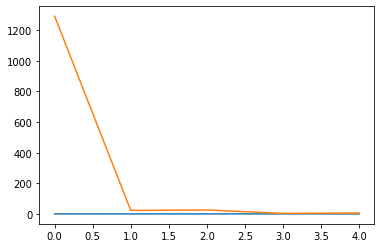

In [19]:
x = np.arange(len(etr[:]))
plt.plot(x,etr[:])
plt.plot(x,ete[:])
print(ete)

In [ ]:
X_train,y_train,X_test,y_test = data_ret(degree=10,split_percent=70)

In [28]:
etr = []
ete = []
for reg in [0,0.1,0.27,0.3,0.33,1,3,10,30,100]:
    train_datasize = X_train.shape[0]
    opt_theta, train_loss , loss_list = linReg(X_train,y_train,iter=20000,alpha=0.0001,batchSize=1000,hypothesis = lin_hyp,loss_function=mse_loss,regularizer=l1_reg,lambda1=reg,lambd2_elasnet = 0.001)
    y_pred_train = lin_hyp(X_train,opt_theta)
    y_pred_test = lin_hyp(X_test,opt_theta)
    mse_tr,_ = accuracy(y_pred_train,y_train)
    mse_te,_ = accuracy(y_pred_test,y_test)
    etr.append(mse_tr)
    ete.append(mse_te)

Loss for 10000 iterations: 410.6366193297613
Loss for 20000 iterations: 353.97242417054446
MSE LOSS
[0.5056655]
MAE LOSS
[0.33794857]
............................................................................
MSE LOSS
[405.75619639]
MAE LOSS
[1.71788375]
............................................................................
Loss for 10000 iterations: 403.67152323678476
Loss for 20000 iterations: 341.7596596640188
MSE LOSS
[0.48821962]
MAE LOSS
[0.33860349]
............................................................................
MSE LOSS
[861.16626282]
MAE LOSS
[2.15039847]
............................................................................
Loss for 10000 iterations: 355.0308179981347
Loss for 20000 iterations: 328.3495543459041
MSE LOSS
[0.46906857]
MAE LOSS
[0.33248336]
............................................................................
MSE LOSS
[160.71539621]
MAE LOSS
[1.21395026]
..........................................................................

[array([405.75619639]), array([861.16626282]), array([160.71539621]), array([701.99087728]), array([87.37864715]), array([1901.41543075]), array([7711.63130341]), array([138199.86449915]), array([1371398.31741607]), array([15184704.36548356])]


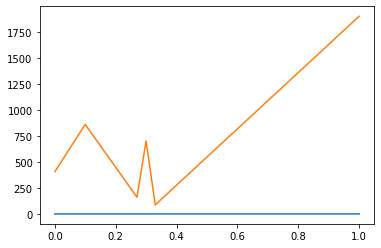

In [33]:
x = np.arange(len(etr[0:6]))
x = [0,0.1,0.27,0.3,0.33,1,3,10,30,100][0:6]
plt.plot(x,etr[0:6])
plt.plot(x,ete[0:6])
print(ete)